In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split



df = pd.read_csv(r"C:\Gachon\3-1\인공지능개론\wine.csv",)

X=df.drop('Wine',axis=1)
X.head()
y=df['Wine']
y.value_counts()
y.head()

Y = pd.get_dummies(y).values

X = X.values
X
y
Y

# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만, 
# 특정 상황이나 설정에 따라 불리언 값(True/False)으로 표현될 수 있음.
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

X_train.shape, X_test.shape, y_train.shape,y_test.shape

((142, 13), (36, 13), (142, 3), (36, 3))

In [5]:
print(X_train.shape)  # X_train의 차원 확인

(142, 13)


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical



model = Sequential()

model.add(Dense(20, input_shape=(13,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 클래스 3개

model.compile(optimizer=Adam(learning_rate=0.04), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


C:\Users\cha08\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523 (2.04 KB)

 Trainable params: 523 (2.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:

import numpy as np

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3229 - loss: 139.3076 - val_accuracy: 0.4000 - val_loss: 19.8581
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3834 - loss: 16.0046 - val_accuracy: 0.4000 - val_loss: 4.0121
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2905 - loss: 5.6318 - val_accuracy: 0.2000 - val_loss: 6.6335
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3073 - loss: 5.5689 - val_accuracy: 0.4000 - val_loss: 1.8017
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3270 - loss: 2.7032 - val_accuracy: 0.4000 - val_loss: 2.5816
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3499 - loss: 2.0233 - val_accuracy: 0.3333 - val_loss: 1.1134
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3585 - loss: 1.2227 - val_accuracy: 0.4000 - val_loss: 1.6844
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3793 - loss: 1.4836 - val_accuracy: 0.3333 - val_loss: 1.2

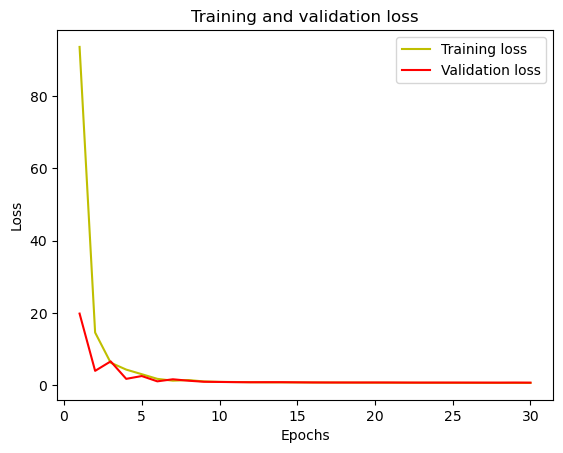

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

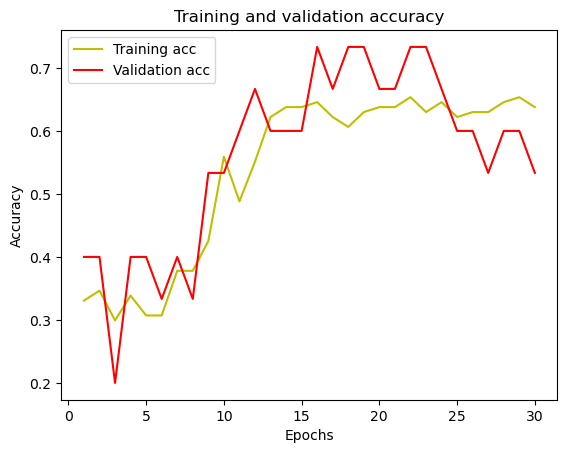

In [17]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.78      0.88      0.82        16
           2       0.25      0.17      0.20         6

    accuracy                           0.78        36
   macro avg       0.65      0.66      0.65        36
weighted avg       0.75      0.78      0.76        36

[[13  0  1]
 [ 0 14  2]
 [ 1  4  1]]
